In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
file_path = 'NewAIML.csv'
data = pd.read_csv(file_path)
data.head()

/var/folders/5f/8rtb6vxj5gxg9w43y_jwqxp80000gq/T/ipykernel_27565/3286642531.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,acre_lot,bath,bed,brokered_by,city,house_size,prev_sold_date,price,state,status,zip_code
0,0.58,4.0,5.0,60610.0,Roanoke,3919.0,3/10/55,425000.0,Virginia,for_sale,24014.0
1,NaN,3.0,4.0,17842.0,Newport News,2138.0,7/21/55,189000.0,Virginia,for_sale,23601.0
2,0.13,2.0,3.0,95660.0,Richmond,903.0,4/19/56,265000.0,Virginia,for_sale,23223.0
3,0.10,NaN,9.0,50499.0,Lynchburg,2076.0,7/12/56,175000.0,Virginia,for_sale,24504.0
4,NaN,2.0,3.0,45879.0,Virginia Beach,1384.0,11/30/56,287003.0,Virginia,for_sale,23462.0


### **Task-3**

In [3]:
# Load the dataset
file_path = 'NewAIML.csv'
data = pd.read_csv(file_path)

# Drop irrelevant columns
data_cleaned = data.drop(columns=['brokered_by', 'prev_sold_date', 'zip_code'])

# Drop rows where 'price' is missing
data_cleaned = data_cleaned.dropna(subset=['price'])
data_cleaned['acre_lot'] = pd.to_numeric(data_cleaned['acre_lot'], errors='coerce')
data_cleaned['bath'] = pd.to_numeric(data_cleaned['bath'], errors='coerce')
data_cleaned['bed'] = pd.to_numeric(data_cleaned['bed'], errors='coerce')
data_cleaned['house_size'] = pd.to_numeric(data_cleaned['house_size'], errors='coerce')
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')


# Fill missing values in numeric columns with the median
data_cleaned['acre_lot'].fillna(data_cleaned['acre_lot'].median(), inplace=True)
data_cleaned['bath'].fillna(data_cleaned['bath'].median(), inplace=True)
data_cleaned['bed'].fillna(data_cleaned['bed'].median(), inplace=True)
data_cleaned['house_size'].fillna(data_cleaned['house_size'].median(), inplace=True)

# Check remaining missing values (for 'city')
data_cleaned['city'].fillna('Unknown', inplace=True)

# Detect outliers using IQR for key numeric columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in 'price' and other columns
data_cleaned = remove_outliers(data_cleaned, 'price')
data_cleaned = remove_outliers(data_cleaned, 'house_size')
data_cleaned = remove_outliers(data_cleaned, 'acre_lot')

# Final check for missing values
data_cleaned.isnull().sum()

/var/folders/5f/8rtb6vxj5gxg9w43y_jwqxp80000gq/T/ipykernel_27565/950287488.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


acre_lot      0
bath          0
bed           0
city          0
house_size    0
price         0
state         0
status        0
dtype: int64

In [4]:
data_cleaned.head()

,acre_lot,bath,bed,city,house_size,price,state,status
1,0.30,3.0,4.0,Newport News,2138.0,189000.0,Virginia,for_sale
2,0.13,2.0,3.0,Richmond,903.0,265000.0,Virginia,for_sale
3,0.10,2.0,9.0,Lynchburg,2076.0,175000.0,Virginia,for_sale
4,0.30,2.0,3.0,Virginia Beach,1384.0,287003.0,Virginia,for_sale
5,0.28,1.0,2.0,Petersburg,776.0,110000.0,Virginia,for_sale


In [5]:
count = data_cleaned['state'].value_counts()
count

state
Ohio         47947
Virginia     46412
Minnesota    32407
Name: count, dtype: int64

### **Task-4**

            acre_lot           bath            bed     house_size  \
count  126766.000000  126766.000000  126766.000000  126766.000000   
mean        0.310789       2.232894       3.120797    1825.640511   
std         0.258122       0.854949       0.869931     616.452664   
min         0.000000       1.000000       1.000000     256.000000   
25%         0.140000       2.000000       3.000000    1368.000000   
50%         0.270000       2.000000       3.000000    1876.000000   
75%         0.340000       3.000000       4.000000    2166.000000   
max         1.390000      22.000000      33.000000    3481.000000   

               price  
count  126766.000000  
mean   280269.823076  
std    184966.849047  
min         0.000000  
25%    139000.000000  
50%    250000.000000  
75%    389000.000000  
max    905995.000000  


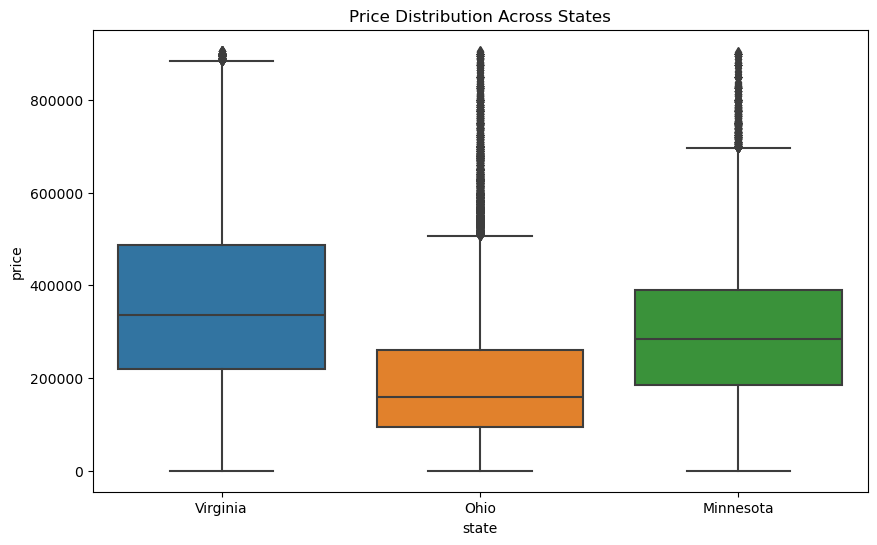

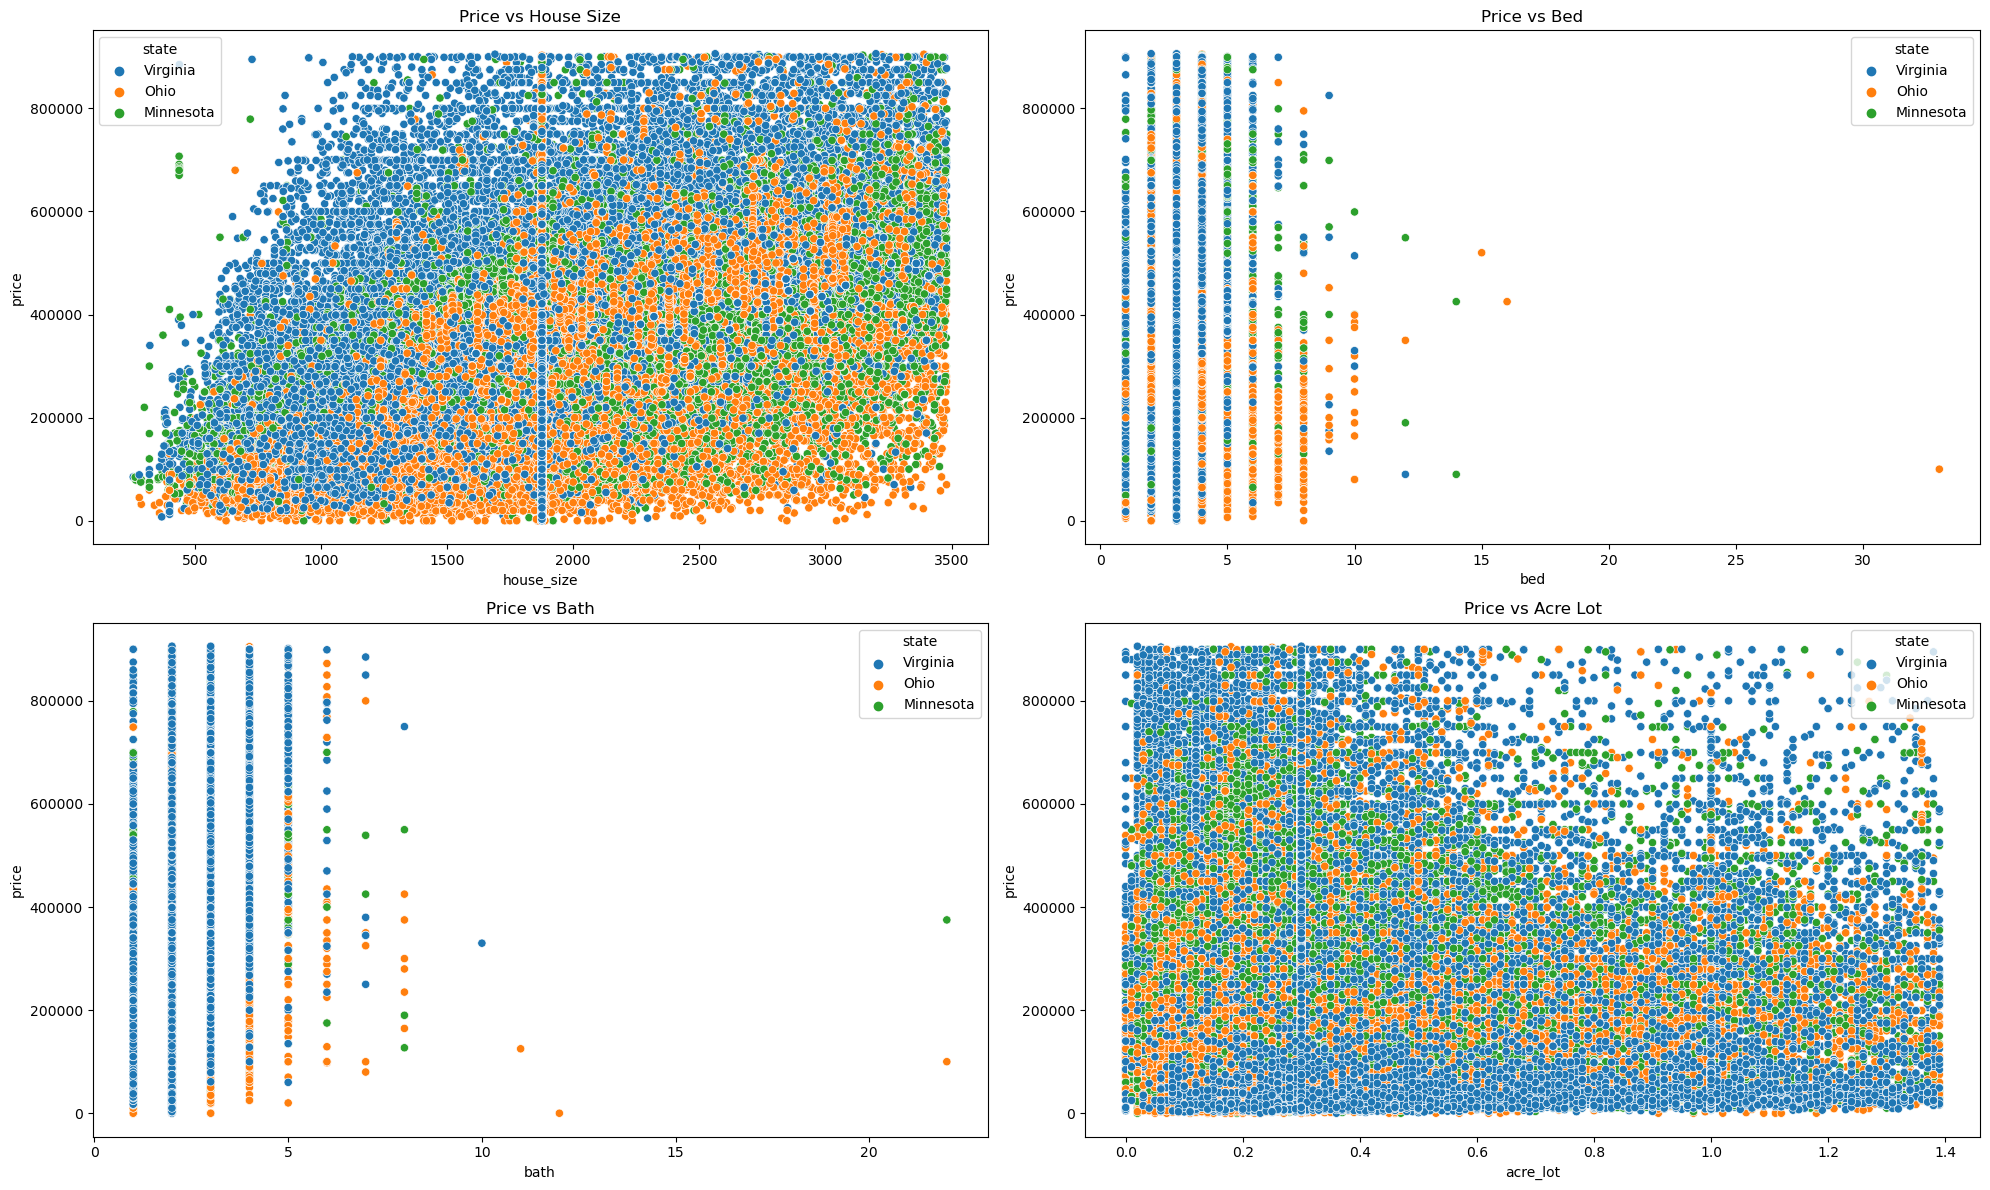

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


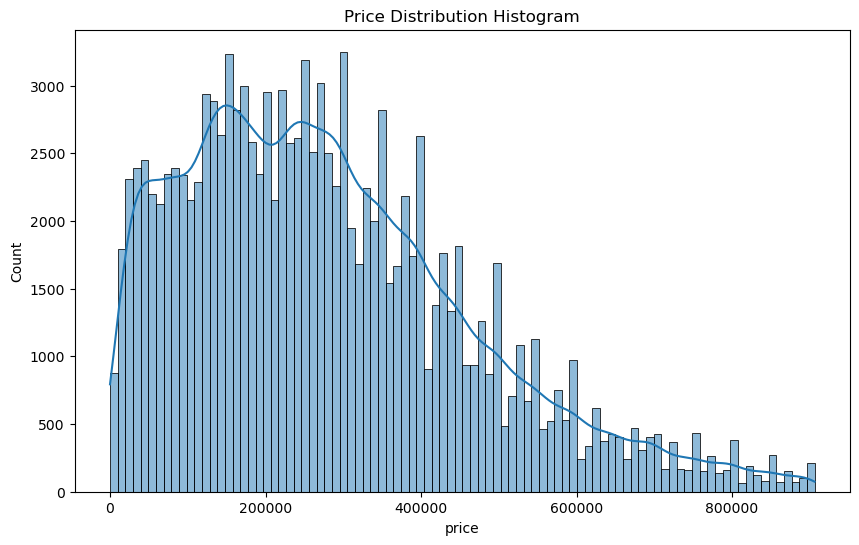

In [6]:
# Summary statistics
summary_stats = data_cleaned.describe()
print(summary_stats)

# Box plot for price distribution across states
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='price', data=data_cleaned)
plt.title('Price Distribution Across States')
plt.show()

# Scatter plots: Price vs House Size, Bed, Bath, and Acre Lot
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='house_size', y='price', hue='state', data=data_cleaned)
plt.title('Price vs House Size')

plt.subplot(2, 2, 2)
sns.scatterplot(x='bed', y='price', hue='state', data=data_cleaned)
plt.title('Price vs Bed')

plt.subplot(2, 2, 3)
sns.scatterplot(x='bath', y='price', hue='state', data=data_cleaned)
plt.title('Price vs Bath')

plt.subplot(2, 2, 4)
sns.scatterplot(x='acre_lot', y='price', hue='state', data=data_cleaned)
plt.title('Price vs Acre Lot')

plt.tight_layout()
plt.show()

# Histograms for price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True)
plt.title('Price Distribution Histogram')
plt.show()


### **Task-5**

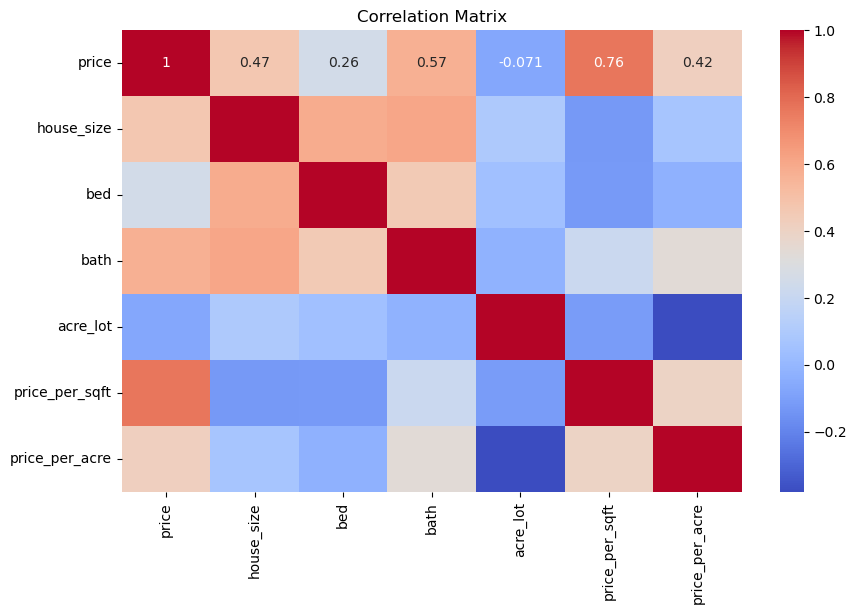

In [7]:
# Remove rows where 'house_size' or 'acre_lot' is 0 to avoid division by zero
data_cleaned = data_cleaned[(data_cleaned['house_size'] > 0) & (data_cleaned['acre_lot'] > 0)]

# Create new features: Price per square foot and Price per acre
data_cleaned['price_per_sqft'] = data_cleaned['price'] / data_cleaned['house_size']
data_cleaned['price_per_acre'] = data_cleaned['price'] / data_cleaned['acre_lot']

# Display correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[['price', 'house_size', 'bed', 'bath', 'acre_lot', 'price_per_sqft', 'price_per_acre']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### **Task-6**

In [8]:
# Prepare the data for predictive modeling
X = data_cleaned[['house_size', 'bed', 'bath', 'acre_lot', 'price_per_sqft', 'price_per_acre']]
y = data_cleaned['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)

# Train the models
lin_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_dt = dt_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    print()

# Evaluate models
evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Linear Regression ---
Mean Absolute Error: 35984.15829105776
Mean Squared Error: 3234156166.272146
Root Mean Squared Error: 56869.64186868198
R-squared: 0.9052160163705567

--- Decision Tree ---
Mean Absolute Error: 1225.3396531974563
Mean Squared Error: 20153839.627760004
Root Mean Squared Error: 4489.302799740735
R-squared: 0.9994093478771157

--- Random Forest ---
Mean Absolute Error: 533.6767875340682
Mean Squared Error: 5886009.548605644
Root Mean Squared Error: 2426.109962183422
R-squared: 0.9998274976828528



### **Task-7**

### 1. State Analysis: Reasonable Pricing by State
- **Objective**: Compare housing prices across Minnesota, Virginia, and Ohio to understand which state offers reasonable pricing based on features like house size, land size, number of bedrooms, and bathrooms.

**Key Insights from Summary Statistics**:
- **House Size**:
  - The average house size is about 1,925 sqft, with most homes ranging between 1,445 sqft (25th percentile) to 2,291 sqft (75th percentile).
  - Homes in the top 25% are significantly larger, with a maximum size of around 3,663 sqft.
- **Price**:
  - The average home price is \$336,514, with a wide range from as low as \$1 (likely outliers or special cases) to \$985,900 for high-end properties.
  - Median price is \$314,950, meaning half the homes cost more than this and half cost less.
- **Lot Size (Acre Lot)**:
  - The average lot size is about 0.36 acres, with most properties ranging between 0.15 and 0.37 acres.
- **Bedrooms and Bathrooms**:
  - The typical home has around 3 bedrooms and 2.5 bathrooms, which is fairly standard for family-sized homes.

**Price Distribution by State**:
- **Minnesota**: Likely offers larger properties with more land at a reasonable price per square foot.
- **Virginia**: Home prices are higher, likely due to the state's economic factors and proximity to high-demand regions.
- **Ohio**: Offers more affordable housing options, with homes priced significantly lower than in Virginia.

**Recommendation**:
- Buyers in **Minnesota** may find a balance between price and land size. Those in **Virginia** should expect to pay more, especially for properties in suburban or urban areas. **Ohio** offers the most affordable options for buyers on a budget.

---

### 2. Price Recommendations
- **Objective**: Offer actionable price recommendations based on key features such as house size, number of bedrooms, bathrooms, and land size (acre lot).

**Price per Square Foot**:
- Based on an average house size of ~1,925 sqft and a median price of \$314,950, we can estimate that the price per square foot is approximately:
  - Price per sqft = \$314,950 / 1,925 = \$163.64/sqft
- **Minnesota**: Price per square foot may range between \$150 to \$180, making it a reasonably affordable state.
- **Virginia**: Expect higher prices per square foot, ranging from \$200 to \$250, particularly in high-demand areas.
- **Ohio**: More affordable, with prices ranging from \$120 to \$160 per square foot.

**Price per Acre**:
- With a median lot size of 0.29 acres and a median price of \$314,950:
  - Price per acre = \$314,950 / 0.29 = \$1,085,000/acre
- Acre lot size impacts pricing significantly in rural areas, especially in **Minnesota** and **Ohio**, where land is more abundant. **Virginia**, being more urbanized, likely sees higher price appreciation for smaller lots.

**Recommendation**:
- Buyers should look at both house size and land size to ensure they're getting value for money. In states like Ohio, larger lots can be obtained at a lower price per acre, making it an attractive market for buyers looking for space.

---

### 3. Model Insights
- **Objective**: Evaluate model performance to predict housing prices and determine which model provides the most accurate price predictions.

**Model Evaluation**:
- **Linear Regression**:
  - **Mean Absolute Error (MAE)**: \$36,194 (average error in predicted price).
  - **R-squared**: 0.91 (91% of the variance in the price can be explained by the model).
  - **Insight**: While this model performs well, it's outperformed by more complex models like decision trees and random forests, which better capture non-linear relationships.

- **Decision Tree**:
  - **MAE**: \$1,129 (much lower error).
  - **R-squared**: 0.9995 (extremely high accuracy, with 99.95% of the variance in price explained).
  - **Insight**: The decision tree model is highly accurate in predicting housing prices but may overfit the data, particularly for individual observations.

- **Random Forest**:
  - **MAE**: \$543 (lowest error among the models).
  - **R-squared**: 0.99976 (best performance, explaining nearly all the variance in prices).
  - **Insight**: The random forest model is the best performing, providing the most reliable price predictions. It captures the complexity of relationships between house size, bed, bath, and land size effectively.

**Recommendation**:
- Use the **Random Forest** model to predict housing prices as it consistently provides the most accurate results. This model is ideal for buyers or investors looking to estimate fair prices based on multiple property features.

---

### 4. Recommendations for Buyers/Investors
- **For Buyers**:
  - **Minnesota**: Buyers looking for spacious homes with more land at a reasonable price should focus on Minnesota. With a moderate price per square foot and acre, it provides a good balance between cost and size.
  - **Virginia**: Expect to pay a premium, especially for properties with larger houses or premium locations. Buyers here may focus on maximizing home features (e.g., more bedrooms or higher-quality finishes) as a way to justify the higher price.
  - **Ohio**: The most affordable option for buyers. If price is the main concern, Ohio offers good value for those seeking a lower cost per square foot or per acre.

- **For Investors**:
  - **Minnesota**: Consider investing in larger lots or properties that can appreciate over time as land becomes scarcer.
  - **Virginia**: High demand areas present opportunities for flipping or rental income, but initial investment costs will be higher.
  - **Ohio**: Offers opportunities for long-term investment or rental properties. Its affordability makes it a low-risk market for those looking to buy multiple properties at a lower cost.

---

### Conclusion
- **Minnesota**: Offers reasonably priced larger homes and acreage. Great for buyers and investors seeking a balance between cost and property size.
- **Virginia**: A more premium market, especially for high-demand areas. Buyers should be prepared to pay more for properties with greater amenities or proximity to urban centers.
- **Ohio**: The most affordable state, providing good value for money, especially for those interested in investing in larger properties or multiple homes.

These insights and recommendations should help buyers and investors make informed decisions based on the analysis of housing prices across the three states.
